In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datacleaned.csv')
df

,Unnamed: 0,Year,Zone_EN,Coordinates,School_Type_EN,Gender_EN,LocalFlag_EN,Number of Failed students,Number of Pass students,Total Number of Students,Graduation %
0,0,2015,Ajman,"25.244000,55.266140",Public Schools,Female,Expat,8,243,251,96.81%
1,1,2015,Ajman,"25.244000,55.266140",Public Schools,Female,Local,20,353,373,94.64%
2,2,2015,Ajman,"25.244000,55.266140",Public Schools,Male,Expat,28,182,210,86.67%
3,3,2015,Ajman,"25.244000,55.266140",Public Schools,Male,Local,23,262,285,91.93%
4,4,2015,Ajman,"25.244000,55.266140",Private Schools,Female,Expat,11,424,435,97.47%
...,...,...,...,...,...,...,...,...,...,...,...
396,396,2019,Umm AlQuwain,"25.520482,55.713391",Private Schools,Male,Expat,0,22,22,100.00%
397,397,2019,Umm AlQuwain,"25.520482,55.713391",Continuing Education Centers,Female,Expat,0,5,5,100.00%
398,398,2019,Umm AlQuwain,"25.520482,55.713391",Continuing Education Centers,Female,Local,4,3,7,42.86%
399,399,2019,Umm AlQuwain,"25.520482,55.713391",Continuing Education Centers,Male,Expat,1,8,9,88.89%


In [7]:
df['Graduation']=df['Number of Pass students']/df['Total Number of Students']
df.head(10)

,Unnamed: 0,Year,Zone_EN,Coordinates,School_Type_EN,Gender_EN,LocalFlag_EN,Number of Failed students,Number of Pass students,Total Number of Students,Graduation %,Graduation
0,0,2015,Ajman,"25.244000,55.266140",Public Schools,Female,Expat,8,243,251,96.81%,0.968127
1,1,2015,Ajman,"25.244000,55.266140",Public Schools,Female,Local,20,353,373,94.64%,0.946381
2,2,2015,Ajman,"25.244000,55.266140",Public Schools,Male,Expat,28,182,210,86.67%,0.866667
3,3,2015,Ajman,"25.244000,55.266140",Public Schools,Male,Local,23,262,285,91.93%,0.919298
4,4,2015,Ajman,"25.244000,55.266140",Private Schools,Female,Expat,11,424,435,97.47%,0.974713
5,5,2015,Ajman,"25.244000,55.266140",Private Schools,Female,Local,0,13,13,100.00%,1.000000
6,6,2015,Ajman,"25.244000,55.266140",Private Schools,Male,Expat,42,535,577,92.72%,0.927210
7,7,2015,Ajman,"25.244000,55.266140",Private Schools,Male,Local,16,58,74,78.38%,0.783784
8,8,2015,Ajman,"25.244000,55.266140",Continuing Education Centers,Female,Expat,26,50,76,65.79%,0.657895
9,9,2015,Ajman,"25.244000,55.266140",Continuing Education Centers,Female,Local,35,48,83,57.83%,0.578313


In [8]:
#Drop Coordinates, Number of Pass students, and Number of Failed Students

df = df.drop(columns=['Unnamed: 0','Coordinates', 'Number of Failed students',	'Number of Pass students', "Graduation %"],                     axis=1)

df.head()

,Year,Zone_EN,School_Type_EN,Gender_EN,LocalFlag_EN,Total Number of Students,Graduation
0,2015,Ajman,Public Schools,Female,Expat,251,0.968127
1,2015,Ajman,Public Schools,Female,Local,373,0.946381
2,2015,Ajman,Public Schools,Male,Expat,210,0.866667
3,2015,Ajman,Public Schools,Male,Local,285,0.919298
4,2015,Ajman,Private Schools,Female,Expat,435,0.974713


In [9]:
# Convert year column to categorical variable

df['Year'].value_counts()

df['Year'] = df['Year'].astype('category')


In [10]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df)
df.head()

,Total Number of Students,Graduation,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Zone_EN_Ajman,Zone_EN_DUBAI,Zone_EN_Fujairah,...,Zone_EN_Sharjah,Zone_EN_Umm AlQuwain,School_Type_EN_ACTVET,School_Type_EN_Continuing Education Centers,School_Type_EN_Private Schools,School_Type_EN_Public Schools,Gender_EN_Female,Gender_EN_Male,LocalFlag_EN_Expat,LocalFlag_EN_Local
0,251,0.968127,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
1,373,0.946381,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
2,210,0.866667,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
3,285,0.919298,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
4,435,0.974713,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0


In [11]:
df.columns

Index(['Total Number of Students', 'Graduation', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Zone_EN_Ajman', 'Zone_EN_DUBAI',
       'Zone_EN_Fujairah', 'Zone_EN_Ras AlKhaima', 'Zone_EN_Sharjah',
       'Zone_EN_Umm AlQuwain', 'School_Type_EN_ACTVET',
       'School_Type_EN_Continuing Education Centers',
       'School_Type_EN_Private Schools', 'School_Type_EN_Public Schools',
       'Gender_EN_Female', 'Gender_EN_Male', 'LocalFlag_EN_Expat',
       'LocalFlag_EN_Local'],
      dtype='object')

In [12]:
#Split dataset into training and test set

X = df.drop(columns= 'Graduation')
y = df['Graduation']

y

0      0.968127
1      0.946381
2      0.866667
3      0.919298
4      0.974713
         ...   
396    1.000000
397    1.000000
398    0.428571
399    0.888889
400    0.904762
Name: Graduation, Length: 401, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Split X and y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)

model = model.fit(X_train, y_train)

In [14]:
# Predict

y_train_pred = model.predict(X_train)

y_pred = model.predict(X_test)




In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)

mse_train = mean_squared_error(y_train, y_train_pred)

print('Mean Absolute Error y:', mae,', ''Mean Squared Error x:', mse)
print('Mean Absolute Error x:', mae_train,', ''Mean Squared Error x:', mse_train)

Mean Absolute Error y: 0.06649692387057783 , Mean Squared Error x: 0.012395310684849638
Mean Absolute Error x: 0.0 , Mean Squared Error x: 0.0


The model is a MAE and MSE of zero on the training data which is an indication of overfitting. We perform a cost complexity pruning of the decision trees.

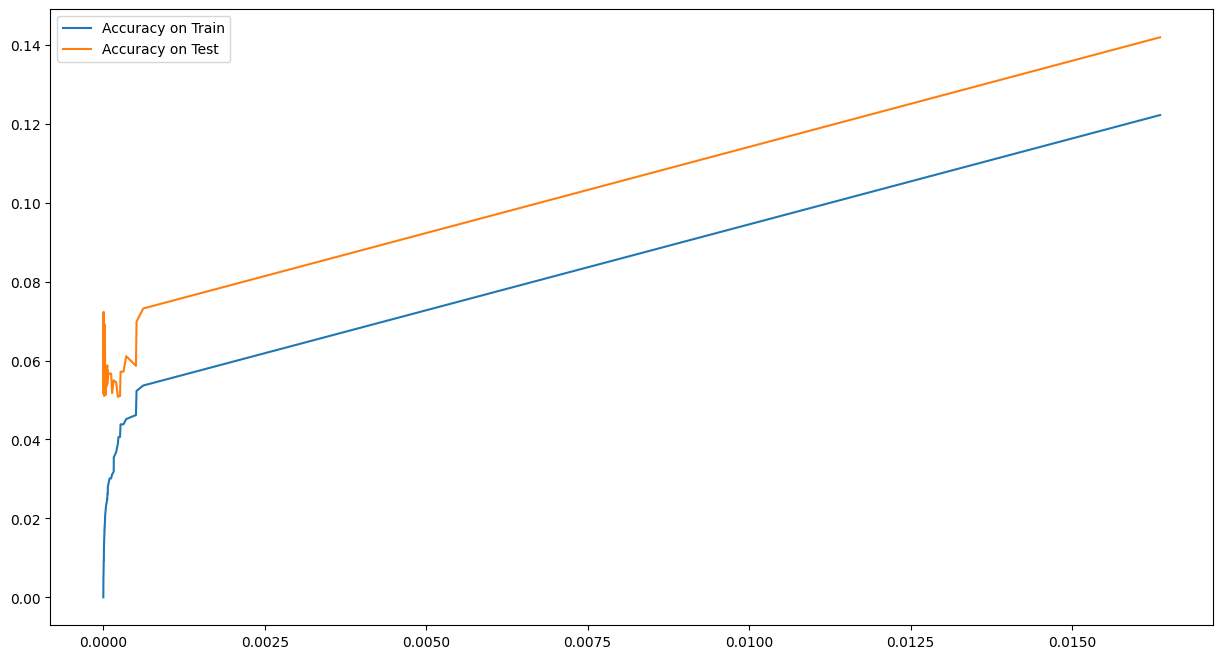

In [16]:
ccp = model.cost_complexity_pruning_path(X_train, y_train)

mae_train, mae_test = [], []

alphas = ccp['ccp_alphas']

for i in alphas:

    model = DecisionTreeRegressor(ccp_alpha=i)

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mae_train.append(mean_absolute_error(y_train, y_train_pred))
    mae_test.append(mean_absolute_error(y_test, y_test_pred))


plt.figure(figsize=(15,8))
sns.lineplot(x=alphas, y=mae_train, label='Accuracy on Train')
sns.lineplot(x=alphas, y=mae_test, label='Accuracy on Test')
plt.show()

As shown above, the optimal ccp_alpha value is about 0.005.

In [17]:
#Fit the model with the alpha value

model = DecisionTreeRegressor(ccp_alpha=0.005, random_state=42)

model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)

print(mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred))

0.07321001965362245 0.05368025681880162
